# Temporal Cross-Validation Tutorial

In this tutorial, we show how to set up a temporal cross-validator for a simple RNN model using the Deep4Cast package. The dataset we're using is from the GEFCom2014 forecasting competition and involved hourly energy load forecasting.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from deep4cast.forecasters import Forecaster, TemporalCrossValidator
import deep4cast.metrics as metrics
from pandas import read_table

%matplotlib inline

Using TensorFlow backend.


## Data preparation

Before we can fit a model we first have to load, clean, and prepare our dataset so that the model can accept it.

In [2]:
# Load the data from file
filename = '../data/energy.csv'
df = read_table(filename, sep=',')

# Prepare the data set
data = df[['load', 'temp']].astype('float32').values
data = np.expand_dims(data, axis=0)

# Let's peek at the data
df.head()

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000
3,2012-01-01 03:00:00,2402.0,31.000000
4,2012-01-01 04:00:00,2403.0,32.000000


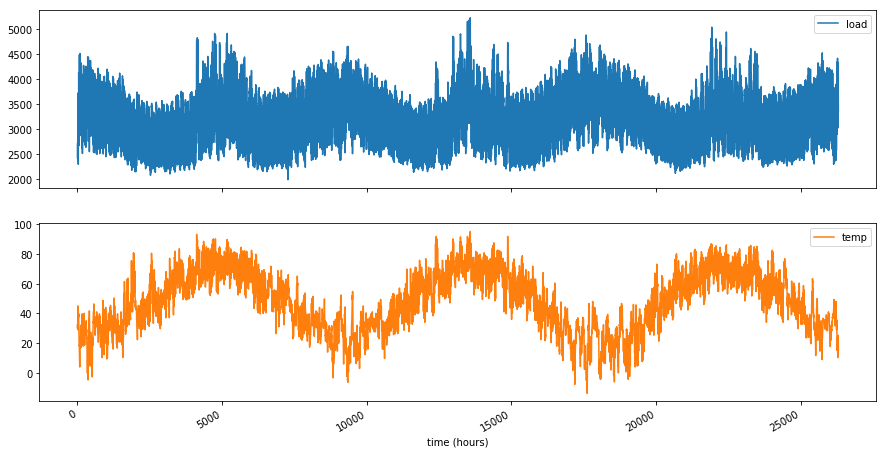

In [3]:
# Let plot the data
df.plot(subplots=True, figsize=(15, 8))
plt.xlabel('time (hours)')
plt.show()

## Recurrent Neural Network Forecaster

First, let's set up the forecaster and the topology that we want to evaluate

In [10]:
topology = [
    {
        'meta': {
            'layer_type': 'GRU', 
            'layer_id': 'gru1', 
            'parent_ids': ['input']
        },
        'params': {
            'units': 16, 
            'activation': 'relu',
            'return_sequences': False
        }
    }
]

In [14]:
params = {
    'topology': topology, 
    'optimizer': 'nadam',
    'lag': 12, 
    'horizon': 2, 
    'batch_size': 8, 
    'max_epochs': 20, 
    'lr': 0.001
}

forecaster = Forecaster(**params)

Now, we create the validator object that essentially just wraps the forecaster.

In [15]:
validator = TemporalCrossValidator(forecaster, n_folds=2, loss='mape')

Let's perform temporal cross-validation on the dataset

In [ ]:
scores = validator.evaluate(data, patience=5)

Let's have a look at the cross-validation scores

In [13]:
scores

{'loss': 4415.48,
 'loss_max': 6193.45,
 'loss_min': 2637.51,
 'loss_std': 1777.97,
 'training_time': 49.12920784950256}